In [1]:
import requests
from datetime import datetime
import time


api_key = "nSJlJTCMVqCArRKWgg3W4tK9LenCmsMd"
base_url = "https://api.nytimes.com/svc/archive/v1/{year}/{month}.json"

start_year = 2013
start_month = 1
end_year = datetime.now().year
end_month = datetime.now().month
search_keywords = [
    "iPhone", "Mac", "MacBook", "MacBook Pro", "MacBook Air", "iMac", 
    "Mac Pro", "Mac Mini", "iPad", "iPad Pro", "iPad Air", "iPad Mini", 
    "Apple Watch", "AirPods", "AirPods Pro", "AirPods Max", "Apple TV", 
    "HomePod", "HomePod Mini", "Apple Pencil", "Magic Keyboard", 
    "Studio Display", "Pro Display XDR",
    "iOS", "macOS", "iPadOS", "watchOS", "tvOS", "Apple", 
    "Apple Music", "Apple Arcade", "Apple News+", "Apple TV+", 
    "Apple Fitness+", "Apple Pay", "Apple Wallet", "Apple Card", 
    "Apple Podcasts", "Apple One", "iCloud", "iCloud+",
    "Retina Display", "Liquid Retina", "Dynamic Island", "M1 Chip", 
    "M2 Chip", "Apple Silicon", "ProMotion", "Face ID", "Touch ID", 
    "MagSafe", "AppleCare", "Handoff", "Continuity", "AirDrop", "iWork",
    "Siri", "Safari", "App Store", "iMessage", "FaceTime", "Find My", 
    "Time Machine", "iTunes",
    "WWDC", "Apple Keynote", "Apple Event", "Spring Loaded", 
    "Far Out Event", "Unleashed Event", "Tim Cook", "Apple Park", 
    "Apple Store", "Apple Stock",
    "Apple AR Glasses", "Vision Pro", "Apple Mixed Reality Headset", 
    "Apple Neural Engine", "Apple Research",' Apple ', ' iPhone ', ' MacBook ', ' iPad ', ' Apple Watch ', ' iOS ', ' MacOS ', 'Mac',
    "Apple Recycling Program", "Apple Environmental Goals"
]

all_articles = []

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        if year == start_year and month < start_month:
            continue
        if year == end_year and month > end_month:
            break

        print(f"Fetching articles for {year}-{month}...") 
        url = base_url.format(year=year, month=month)
        params = {'api-key': api_key}
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            articles = data['response']['docs']
            
            for article in articles:
                for keyword in search_keywords:
                    if keyword.lower() in article['headline']['main'].lower():
                        all_articles.append(article)
                        break  
            
            print(f"Found {len(articles)} articles in {year}-{month}")
        elif response.status_code == 429:
            print(f"Rate limit hit: Error 429 for {year}-{month}. Waiting for 60 seconds...")
            time.sleep(60) 
            continue
        else:
            print(f"Error fetching articles for {year}-{month}: {response.status_code}")
            break

        time.sleep(6)

print(f"Total articles related to Apple products: {len(all_articles)}")

Fetching articles for 2013-1...
Found 7961 articles in 2013-1
Fetching articles for 2013-2...
Found 7504 articles in 2013-2
Fetching articles for 2013-3...
Found 8181 articles in 2013-3
Fetching articles for 2013-4...
Found 7616 articles in 2013-4
Fetching articles for 2013-5...
Found 7968 articles in 2013-5
Fetching articles for 2013-6...
Found 7401 articles in 2013-6
Fetching articles for 2013-7...
Found 6870 articles in 2013-7
Fetching articles for 2013-8...
Found 6634 articles in 2013-8
Fetching articles for 2013-9...
Rate limit hit: Error 429 for 2013-9. Waiting for 60 seconds...
Fetching articles for 2013-10...
Found 7711 articles in 2013-10
Fetching articles for 2013-11...
Found 7015 articles in 2013-11
Fetching articles for 2013-12...
Found 6775 articles in 2013-12
Fetching articles for 2014-1...
Found 7337 articles in 2014-1
Fetching articles for 2014-2...
Found 6941 articles in 2014-2
Fetching articles for 2014-3...
Found 7187 articles in 2014-3
Fetching articles for 2014-4..

In [2]:
import pandas as pd

pd.DataFrame(all_articles).to_csv('Apple_News_Articles_2013_1_2024_10.csv')

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
news_data = pd.read_csv('Apple_News_Articles_2013_1_2024_10.csv')

In [3]:
news_data.shape

(2712, 21)

In [4]:
news_data.columns

Index(['Unnamed: 0', 'abstract', 'web_url', 'snippet', 'lead_paragraph',
       'print_section', 'print_page', 'source', 'multimedia', 'headline',
       'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name',
       'byline', 'type_of_material', '_id', 'word_count', 'uri',
       'subsection_name'],
      dtype='object')

In [5]:
news_data.shape

(2712, 21)

In [6]:
filtered_columns_data = news_data[['abstract','snippet','lead_paragraph','headline','pub_date']]
import ast
filtered_columns_data = pd.concat([filtered_columns_data.drop('headline',axis = 1),pd.json_normalize([ast.literal_eval(item) for item in list(filtered_columns_data['headline'])])[['main','kicker','print_headline']]],axis = 1)
print('Checking for null values')
display({i:filtered_columns_data[i].isna().sum() for i in filtered_columns_data})
print('Removing NULL values')
display([filtered_columns_data[i].fillna('',inplace=True) for i in filtered_columns_data])
print('Checking for null values')
display({i:filtered_columns_data[i].isna().sum() for i in filtered_columns_data})

Checking for null values


{'abstract': 3,
 'snippet': 20,
 'lead_paragraph': 14,
 'pub_date': 0,
 'main': 0,
 'kicker': 1569,
 'print_headline': 0}

Removing NULL values


[None, None, None, None, None, None, None]

Checking for null values


{'abstract': 0,
 'snippet': 0,
 'lead_paragraph': 0,
 'pub_date': 0,
 'main': 0,
 'kicker': 0,
 'print_headline': 0}

In [7]:
text = []
for j in range(filtered_columns_data.shape[0]):
    str1=''
    for i in [0,1,2,4,5,6]:
        str1 += filtered_columns_data.iloc[j,i]
    text.append(str1)
# filtered_columns_data.iloc[:,5:]
filtered_columns_data['text_in_article'] = text
display(filtered_columns_data.columns)
display(filtered_columns_data.shape)


Index(['abstract', 'snippet', 'lead_paragraph', 'pub_date', 'main', 'kicker',
       'print_headline', 'text_in_article'],
      dtype='object')

(2712, 8)

In [ ]:
# !pip install transformers
# !pip install tf-keras
# !pip install tqdm



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\janan\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from transformers import pipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

# Setup tqdm to show progress in apply functions
tqdm.pandas()

# Download necessary NLTK data
# nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer and Summarizer
sid = SentimentIntensityAnalyzer()
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Placeholder for your filtered data
df = filtered_columns_data

# Define functions for summarization and sentiment analysis
def get_dynamic_lengths(text):
    input_length = len(text.split())  
    dynamic_max_length = min(100, int(input_length / 2))
    dynamic_min_length = min(dynamic_max_length - 10, 25) 
    return dynamic_max_length, dynamic_min_length

def summarize_text(text):
    if len(text) > 50:
        dynamic_max_length, dynamic_min_length = get_dynamic_lengths(text)
        summary = summarizer(text, max_length=dynamic_max_length, min_length=dynamic_min_length, do_sample=False)
        return summary[0]['summary_text']
    return text

def get_sentiment(text):
    return sid.polarity_scores(text)

# Step 1: Summarize Text with Progress Bar and Parallel Processing
with ThreadPoolExecutor() as executor:
    df['summary'] = list(tqdm(executor.map(summarize_text, df['text_in_article']), total=len(df), desc="Summarizing"))

# Step 2: Perform Sentiment Analysis with Progress Bar
df['sentiment'] = df['summary'].progress_apply(get_sentiment)
df_sentiment = df['sentiment'].apply(pd.Series)
df = pd.concat([df, df_sentiment], axis=1)

# sentiment_by_date = df.groupby('pub_date').mean()
# print(sentiment_by_date)


In [15]:
# import pandas as pd
# from transformers import pipeline
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk

# # nltk.download('vader_lexicon')
# sid = SentimentIntensityAnalyzer()
# summarizer = pipeline("summarization", model="facebook/bart-large-cnn") # ,framework='pt'

# df = filtered_columns_data

# def get_dynamic_lengths(text):
#     input_length = len(text.split())  
#     dynamic_max_length = min(100, int(input_length / 2))
#     dynamic_min_length = min(dynamic_max_length - 10, 25) 
#     return dynamic_max_length, dynamic_min_length

# def summarize_text(text):
#     if len(text) > 50:
#         dynamic_max_length, dynamic_min_length = get_dynamic_lengths(text)

#         summary = summarizer(text, max_length=dynamic_max_length, min_length=dynamic_min_length, do_sample=False)
#         return summary[0]['summary_text']
#     return text  

# def get_sentiment(text):
#     return sid.polarity_scores(text)

# df['summary'] = df['text_in_article'].apply(summarize_text)
# df['sentiment'] = df['summary'].apply(get_sentiment)
# df_sentiment = df['sentiment'].apply(pd.Series)

# df = pd.concat([df, df_sentiment], axis=1)

# sentiment_by_date = df.groupby('pub_date').mean()
# print(sentiment_by_date)


In [14]:
df.to_csv('articles_sentiment.csv')

In [13]:
# df[''].head()

,abstract,snippet,lead_paragraph,pub_date,main,kicker,print_headline,text_in_article,summary,sentiment,neg,neu,pos,compound
0,"For all of its comments and reviews, does Trip...","For all of its comments and reviews, does Trip...","In October, on assignment to find the cheapest...",2013-01-01T16:37:28+0000,Using TripAdvisor? Some Advice,Frugal Traveler,Using TripAdvisor? Some Advice,"For all of its comments and reviews, does Trip...",Using TripAdvisor? Some Advice. The Frugal Tra...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp...",0.000,0.779,0.221,0.8374
1,"Tips for using TripAdvisor, a bigger tax bite ...","Tips for using TripAdvisor, a bigger tax bite ...",,2013-01-02T13:48:39+0000,Wednesday Reading: Tips for Using TripAdvisor,Bucks,,"Tips for using TripAdvisor, a bigger tax bite ...","Tips for using TripAdvisor, a bigger tax bite ...","{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",0.000,0.850,0.150,0.5719
2,"On the morning of New Year’s Day, many iPhone ...","On the morning of New Year’s Day, many iPhone ...",2:01 p.m. | Updated Adding response from Apple.,2013-01-02T18:55:25+0000,"The iPhone Goofs Up on Telling Time, Again",Bits,,"On the morning of New Year’s Day, many iPhone ...","On the morning of New Year’s Day, many iPhone ...","{'neg': 0.052, 'neu': 0.783, 'pos': 0.165, 'co...",0.052,0.783,0.165,0.5358
3,"Cygnett, an Australian maker of gadget accesso...","Cygnett, an Australian maker of gadget accesso...","Cygnett, an Australian maker of gadget accesso...",2013-01-03T12:19:33+0000,Protect Your iPhone With a Vision From Australia,Gadgetwise,Protect Your Phone With a Vision From Australia,"Cygnett, an Australian maker of gadget accesso...","Cygnett, an Australian maker of gadget accesso...","{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.000,0.806,0.194,0.7184
4,MediaTek of Taiwan not only provides manufactu...,MediaTek of Taiwan not only provides manufactu...,"TAIPEI — In the China smartphone market, Apple...",2013-01-07T03:04:20+0000,Providing a Template to Challenge Apple,,MediaTek Chips Change China’s Smartphone Market,MediaTek of Taiwan not only provides manufactu...,MediaTek of Taiwan provides manufacturers with...,"{'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'comp...",0.053,0.947,0.000,-0.1280


In [1]:
import requests

In [2]:
# import requests
# import json

# # Define the Ollama server URL
# ollama_url = "http://127.0.0.1:11434/api/generate"

# # Test connection to Ollama and gather the response in one line
# def test_connection():
#     # Simple payload with a basic prompt
#     payload = {
#         "model": "llama2",
#         "prompt": "Can you help me build summarize a text and further go on and find it's sentiment?"
#     }
    
#     try:
#         response = requests.post(ollama_url, json=payload, stream=True)
        
#         # Collect each partial response into a list
#         full_response = []
        
#         for line in response.iter_lines():
#             if line:
#                 try:
#                     # Parse each line as a separate JSON object
#                     data = json.loads(line.decode('utf-8'))
#                     # Append the "response" field to the list
#                     partial_response = data.get("response", "")
#                     full_response.append(partial_response)
#                 except json.JSONDecodeError as e:
#                     print("JSON decoding error:", e)
        
#         # Join all parts into a single string
#         final_response = "".join(full_response)
#         print("Final response:", final_response)
        
#     except Exception as e:
#         print("Error connecting to Ollama:", str(e))

# # Run the connection test
# test_connection()


In [3]:
import requests
import json
import re

ollama_url = "http://127.0.0.1:11434/api/generate"

def summarize_text(text):
    payload = {
        "model": "llama2",
        "prompt": f"Summarize the following text:\n\n{text}\n\nSummary:"
    }
    
    response = requests.post(ollama_url, json=payload, stream=True)
    full_response = []
    
    for line in response.iter_lines():
        if line:
            data = json.loads(line.decode('utf-8'))
            partial_response = data.get("response", "")
            full_response.append(partial_response)
    # print('Summary ',"".join(full_response))
    return "".join(full_response)

def analyze_sentiment(text):
    payload = {
        "model": "llama2",
        "prompt": f"Analyze the sentiment of the following text and provide just the sentiment scores in the format {{'neg': , 'neu': , 'pos': , 'compound': }}:\n\n{text}\n\nSentiment Scores: in 2 decimals . Please do not output any other text in your response"
    }
    
    response = requests.post(ollama_url, json=payload, stream=True)
    full_response = []
    
    for line in response.iter_lines():
        if line:
            data = json.loads(line.decode('utf-8'))
            partial_response = data.get("response", "")
            full_response.append(partial_response)
    
    response_text = "".join(full_response)

    scores = {
        "neg": 0.0,
        "neu": 0.0,
        "pos": 0.0,
        "compound": 0.0
    }
    
    match = re.search(r"\{(.*)\}", response_text)
    # scores['neg'] = match.group(1).split(',')[0].split(': ')[1]
    # sent_scores = [match.group(1).split(',')[i].split(': ')[1] for i in [0,1,2,3]]
    # print(match.group(1))
    if not match:
        return scores
    if len(match.group(1).split(',')) > 0:
        scores['neg'] = match.group(1).split(',')[0].split(': ')[1]
    if len(match.group(1).split(',')) > 1:
        scores['neu'] = match.group(1).split(',')[1].split(': ')[1]
    if len(match.group(1).split(',')) > 2:
        scores['pos'] = match.group(1).split(',')[2].split(': ')[1]
    if len(match.group(1).split(',')) > 3:
        scores['compound'] = match.group(1).split(',')[3].split(': ')[1]
    # print(scores)
    
    return scores


In [4]:
import pandas as pd
import ast

news_data = pd.read_csv('Apple_News_Articles_2013_1_2024_10.csv')
filtered_columns_data = news_data[['abstract','snippet','lead_paragraph','headline','pub_date']]

filtered_columns_data = pd.concat([filtered_columns_data.drop('headline',axis = 1),pd.json_normalize([ast.literal_eval(item) for item in list(filtered_columns_data['headline'])])[['main','kicker','print_headline']]],axis = 1)
print('Checking for null values')
display({i:filtered_columns_data[i].isna().sum() for i in filtered_columns_data})
print('Removing NULL values')
display([filtered_columns_data[i].fillna('',inplace=True) for i in filtered_columns_data])
print('Checking for null values')
display({i:filtered_columns_data[i].isna().sum() for i in filtered_columns_data})

text = []
for j in range(filtered_columns_data.shape[0]):
    str1=''
    for i in [0,1,2,4,5,6]:
        str1 += filtered_columns_data.iloc[j,i]
    text.append(str1)
# filtered_columns_data.iloc[:,5:]
filtered_columns_data['text_in_article'] = text
display(filtered_columns_data.columns)
display(filtered_columns_data.shape)


Checking for null values


{'abstract': 10,
 'snippet': 66,
 'lead_paragraph': 33,
 'pub_date': 0,
 'main': 0,
 'kicker': 3672,
 'print_headline': 0}

Removing NULL values


C:\Users\janan\AppData\Local\Temp\ipykernel_2160\1103216963.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  display([filtered_columns_data[i].fillna('',inplace=True) for i in filtered_columns_data])


[None, None, None, None, None, None, None]

Checking for null values


{'abstract': 0,
 'snippet': 0,
 'lead_paragraph': 0,
 'pub_date': 0,
 'main': 0,
 'kicker': 0,
 'print_headline': 0}

Index(['abstract', 'snippet', 'lead_paragraph', 'pub_date', 'main', 'kicker',
       'print_headline', 'text_in_article'],
      dtype='object')

(6099, 8)

In [ ]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

df = filtered_columns_data

with ThreadPoolExecutor() as executor:
    df['summary'] = list(tqdm(executor.map(summarize_text, df['text_in_article']), total=len(df), desc="Summarizing"))



Summarizing:  51%|██████████████████████████████                             | 3112/6099 [36:06:14<25:44:16, 31.02s/it]

In [ ]:
# pip install tqdm
df.to_csv('summarized_articles.csv')
import pandas as pd
from tqdm import tqdm

tqdm.pandas()  # Register `tqdm` with pandas


Fetching Sentiments

In [ ]:
df['sentiment'] = df['summary'].progress_apply(analyze_sentiment)
df_sentiment = df['sentiment'].apply(pd.Series)
df = pd.concat([df, df_sentiment], axis=1)
df.head(5)

100%|████████████████████████████████████████████████████████████████████████████████████████| 2712/2712 [17:08:09<00:00, 22.75s/it]


,abstract,snippet,lead_paragraph,pub_date,main,kicker,print_headline,text_in_article,summary,sentiment,neg,neu,pos,compound
0,"For all of its comments and reviews, does Trip...","For all of its comments and reviews, does Trip...","In October, on assignment to find the cheapest...",2013-01-01T16:37:28+0000,Using TripAdvisor? Some Advice,Frugal Traveler,Using TripAdvisor? Some Advice,"For all of its comments and reviews, does Trip...",The article discusses whether TripAdvisor trul...,"{'neg': '0.5', 'neu': '0.3', 'pos': '0.2', 'co...",0.5,0.3,0.2,0.6
1,"Tips for using TripAdvisor, a bigger tax bite ...","Tips for using TripAdvisor, a bigger tax bite ...",,2013-01-02T13:48:39+0000,Wednesday Reading: Tips for Using TripAdvisor,Bucks,,"Tips for using TripAdvisor, a bigger tax bite ...",The article provides tips for using the travel...,"{'neg': '0.15', 'neu': '0.38', 'pos': '0.47', ...",0.15,0.38,0.47,0.02
2,"On the morning of New Year’s Day, many iPhone ...","On the morning of New Year’s Day, many iPhone ...",2:01 p.m. | Updated Adding response from Apple.,2013-01-02T18:55:25+0000,"The iPhone Goofs Up on Telling Time, Again",Bits,,"On the morning of New Year’s Day, many iPhone ...","On New Year's Day, a bug affected the Do Not D...","{'neg': '0.67', 'neu': '0.33', 'pos': '0.0', '...",0.67,0.33,0.0,0
3,"Cygnett, an Australian maker of gadget accesso...","Cygnett, an Australian maker of gadget accesso...","Cygnett, an Australian maker of gadget accesso...",2013-01-03T12:19:33+0000,Protect Your iPhone With a Vision From Australia,Gadgetwise,Protect Your Phone With a Vision From Australia,"Cygnett, an Australian maker of gadget accesso...","Cygnett, an Australian company, has partnered ...","{'neg': '0.3', 'neu': '0.7', 'pos': '1.0', 'co...",0.3,0.7,1.0,1.0
4,MediaTek of Taiwan not only provides manufactu...,MediaTek of Taiwan not only provides manufactu...,"TAIPEI — In the China smartphone market, Apple...",2013-01-07T03:04:20+0000,Providing a Template to Challenge Apple,,MediaTek Chips Change China’s Smartphone Market,MediaTek of Taiwan not only provides manufactu...,"MediaTek, a Taiwan-based company, provides not...","{'neg': '0.17', 'neu': '0.83', 'pos': '0.94', ...",0.17,0.83,0.94,0.65


In [ ]:
df.to_csv('articles_sentiment_llm.csv')

#### Stcok_forecast

In [64]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

ticker = "AAPL"
stock_data = yf.download(ticker, start="2013-01-01", end="2024-11-21")
stock_data.to_csv("apple_stock_data.csv")
data = pd.read_csv('apple_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


C:\Users\janan\AppData\Local\Temp\ipykernel_14520\2984619210.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


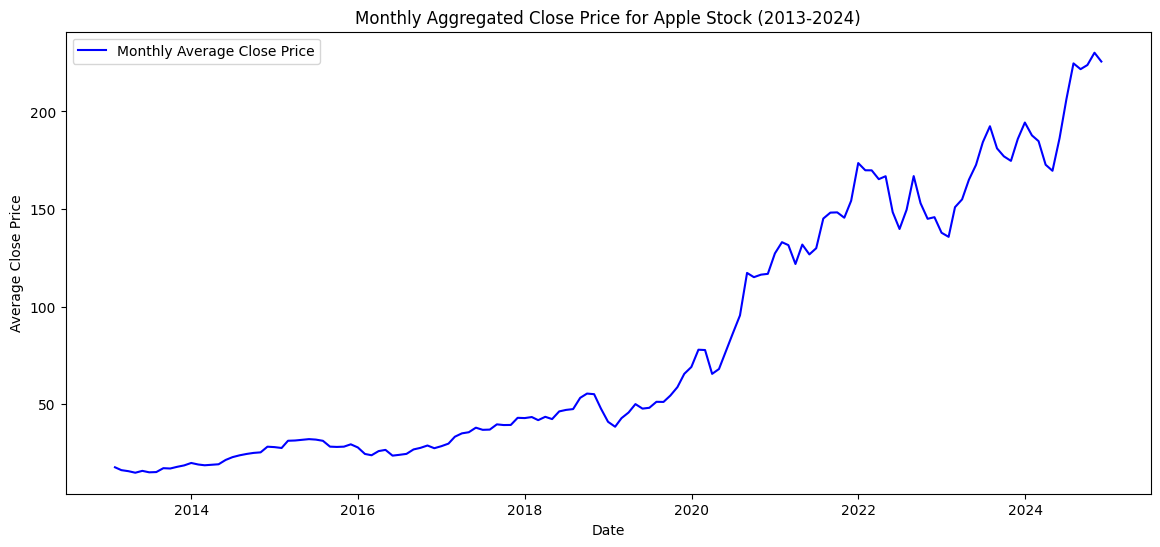

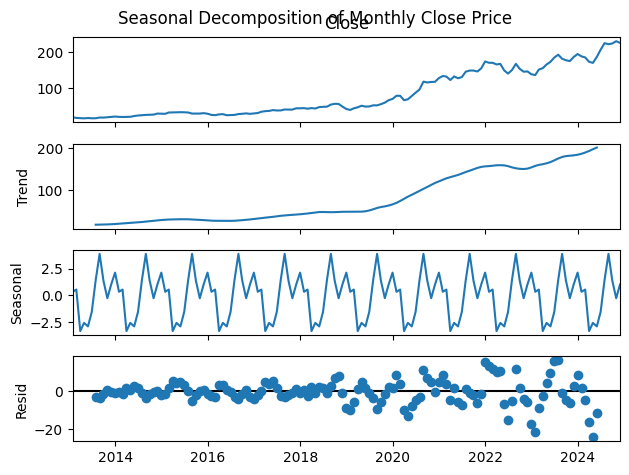

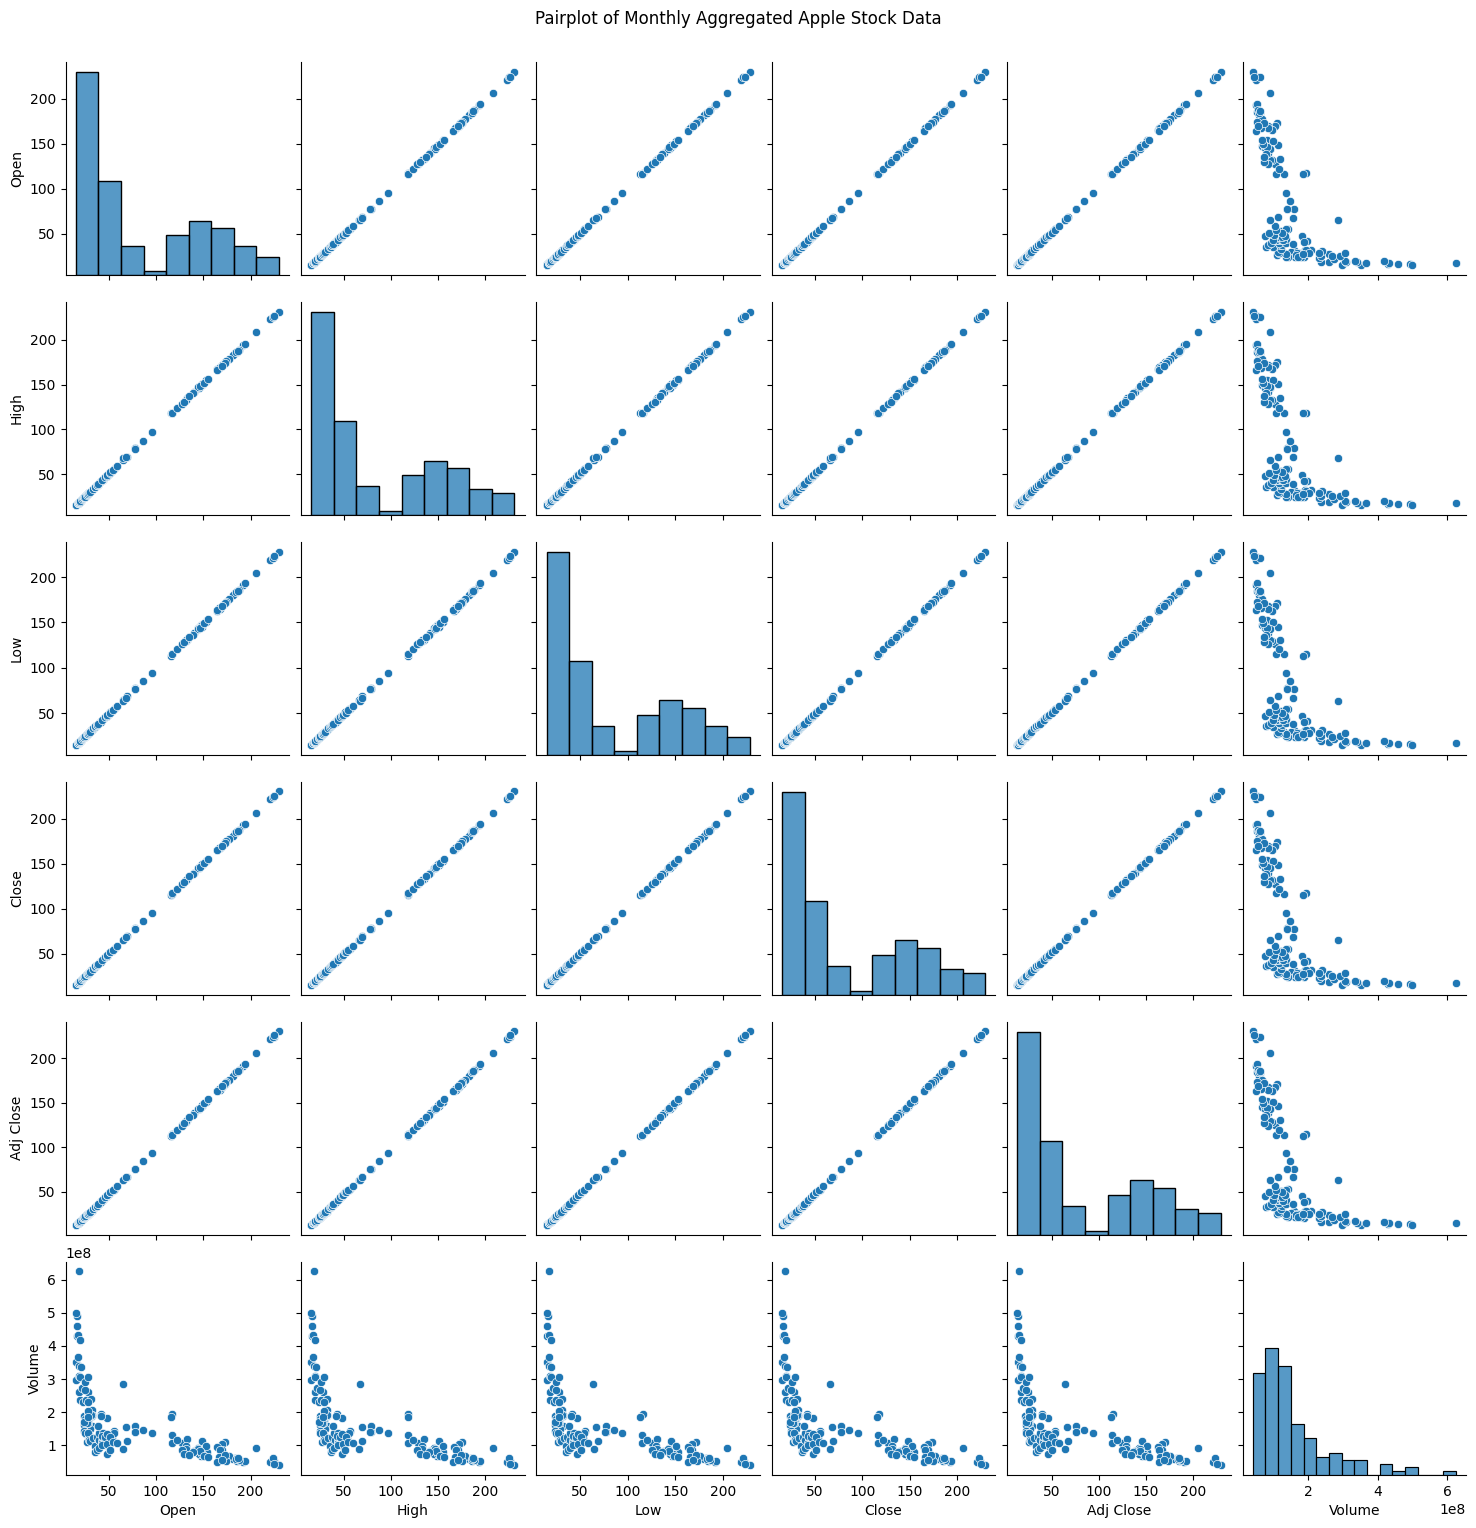

In [65]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

monthly_data = data.resample('M').mean()


plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['Close'], label='Monthly Average Close Price', color='blue')
plt.title('Monthly Aggregated Close Price for Apple Stock (2013-2024)')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

decomposition = seasonal_decompose(monthly_data['Close'], model='additive')
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Close Price')
plt.show()

sns.pairplot(monthly_data)
plt.suptitle('Pairplot of Monthly Aggregated Apple Stock Data', y=1.02)
plt.show()

monthly_data_stats = monthly_data.describe()


1. Observed Component (Top Panel):

- The time series demonstrates an upward trend over time, indicating consistent growth in the stock price.
- Some fluctuations and minor drops can be observed, reflecting real-world market behavior.
2. Trend Component (Second Panel):


- The upward trend confirms long-term positive growth in the stock price.
- The steep incline from 2020 onwards could indicate periods of significant growth, possibly driven by major product launches, events, or favorable market conditions.
3. Seasonal Component (Third Panel):

- There is a clear periodic pattern, with regular peaks and troughs.
- This suggests seasonality in the stock price, which could be tied to predictable factors such as:
    - Quarterly earnings reports.
    - Holiday sales seasons boosting revenue (e.g., the holiday quarter for Apple products).
    - Cyclical market trends.
4. Residual Component (Bottom Panel):

- The residual values are relatively small, indicating that most variations in the data are well-accounted for by the trend and seasonal components.
- Outliers in the residuals, especially in recent years, could correspond to unexpected market events, such as economic shifts, global crises, or one-off events like product recalls or supply chain disruptions.

C:\Users\janan\AppData\Local\Temp\ipykernel_14520\2065221457.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_data.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', color='red')


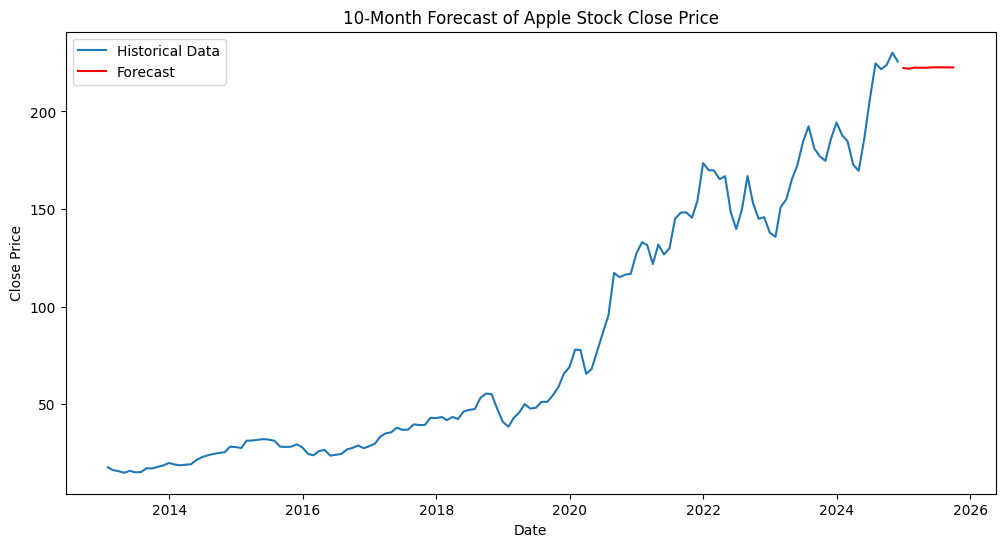

2024-12-31    222.184642
2025-01-31    221.847525
2025-02-28    222.438895
2025-03-31    222.381784
2025-04-30    222.388991
2025-05-31    222.522361
2025-06-30    222.594396
2025-07-31    222.569599
2025-08-31    222.549697
2025-09-30    222.548467
Freq: ME, Name: predicted_mean, dtype: float64

In [66]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(monthly_data['Close'], order=(5, 1, 0))
model_fit = model.fit()


forecast = model_fit.forecast(steps=10)


plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Close'], label='Historical Data')
plt.plot(pd.date_range(monthly_data.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('10-Month Forecast of Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

forecast

00:00:26 - cmdstanpy - INFO - Chain [1] start processing
00:00:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\janan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


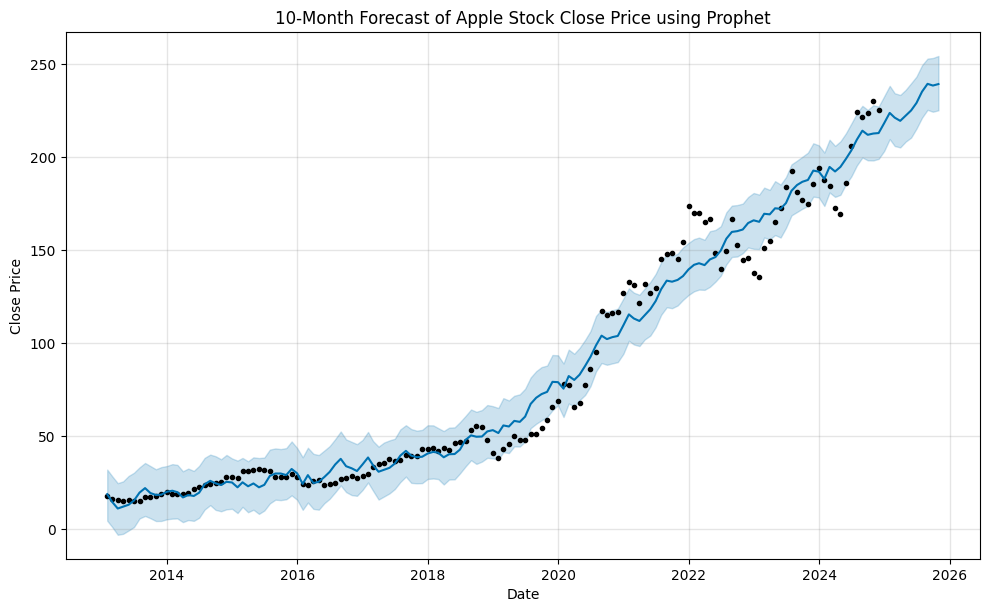

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15,2014-04-30,19.003068,4.991437,32.654918,19.003068,19.003068,-0.558142,-0.558142,-0.558142,-0.558142,-0.558142,-0.558142,0.0,0.0,0.0,18.444926
38,2016-03-31,28.414875,10.984745,40.585701,28.414875,28.414875,-3.548461,-3.548461,-3.548461,-3.548461,-3.548461,-3.548461,0.0,0.0,0.0,24.866414
23,2014-12-31,22.292475,11.041072,38.099053,22.292475,22.292475,2.894290,2.894290,2.894290,2.894290,2.894290,2.894290,0.0,0.0,0.0,25.186766
150,2025-07-31,230.851452,221.257642,249.467742,230.075056,231.669266,4.401587,4.401587,4.401587,4.401587,4.401587,4.401587,0.0,0.0,0.0,235.253039
124,2023-05-31,174.042146,156.847301,185.332384,174.042146,174.042146,-1.735093,-1.735093,-1.735093,-1.735093,-1.735093,-1.735093,0.0,0.0,0.0,172.307053


In [67]:
from prophet import Prophet


prophet_data = monthly_data.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_data)

future_dates = model.make_future_dataframe(periods=11, freq='M')

forecast = model.predict(future_dates)

fig = model.plot(forecast)
plt.title('10-Month Forecast of Apple Stock Close Price using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
forecast.sample(5)


The plot generated by the Prophet model provides a visual representation of the historical Apple stock data, as well as the model's forecast for the next 10 months. Here’s an explanation of each element on the plot:

### Explanation of the Plot:
1. **Black Dots (Observed Data)**:
   - The black dots represent the actual, historical observed close prices of the Apple stock from 2014 to 2024. These points provide a visual record of how the stock price has evolved over time.

2. **Blue Line (Forecasted Line)**:
   - The solid blue line represents the predicted values (the `yhat` column) generated by the Prophet model. It shows the model's best estimate for the closing prices of Apple stock over the forecast period (in this case, 10 months into 2024).

3. **Light Blue Shaded Area (Uncertainty Interval)**:
   - The shaded blue region around the forecasted line represents the confidence interval (typically 80% or 95%) of the forecast. This interval, depicted by the `yhat_lower` and `yhat_upper` columns, indicates the range within which the model predicts the actual stock prices are likely to fall. A wider shaded area suggests greater uncertainty in the forecast, while a narrower area indicates higher confidence.

### Interpretation:
- **Trend and Seasonality**: The blue line follows an upward trend, suggesting that the model anticipates the Apple stock prices to continue rising over the forecast period. The small fluctuations and curvature in the line indicate the model's understanding of seasonal patterns in the data.
- **Confidence Interval Significance**: The light blue area helps convey the uncertainty of the forecast. If the shaded region is narrow, the model is confident in its predictions; if it is wide, the model has lower confidence and there is more uncertainty about where the actual prices might land.
- **Model Accuracy and Observed Data**: Comparing the blue line (forecast) with the black dots (actual data) up to the present gives an idea of how well the model fits the historical data. If the blue line closely aligns with the black dots, the model has learned the data's trend and seasonality well.

### Key Takeaways:
- **Overall Upward Trend**: The blue line indicates that the Prophet model predicts an upward trend in Apple stock prices for the next 10 months.
- **Predictive Range**: The light blue confidence interval shows the expected range where the actual stock prices may fall, providing a measure of uncertainty in the prediction.
- **Historical Fit**: By seeing how the forecast line aligns with past observed data (the black dots), you can assess how effectively the model has captured historical trends and seasonality.

This plot is useful for visualizing not just the central forecast but also the uncertainty, which is important for understanding the risk and reliability of predictions in financial forecasting.

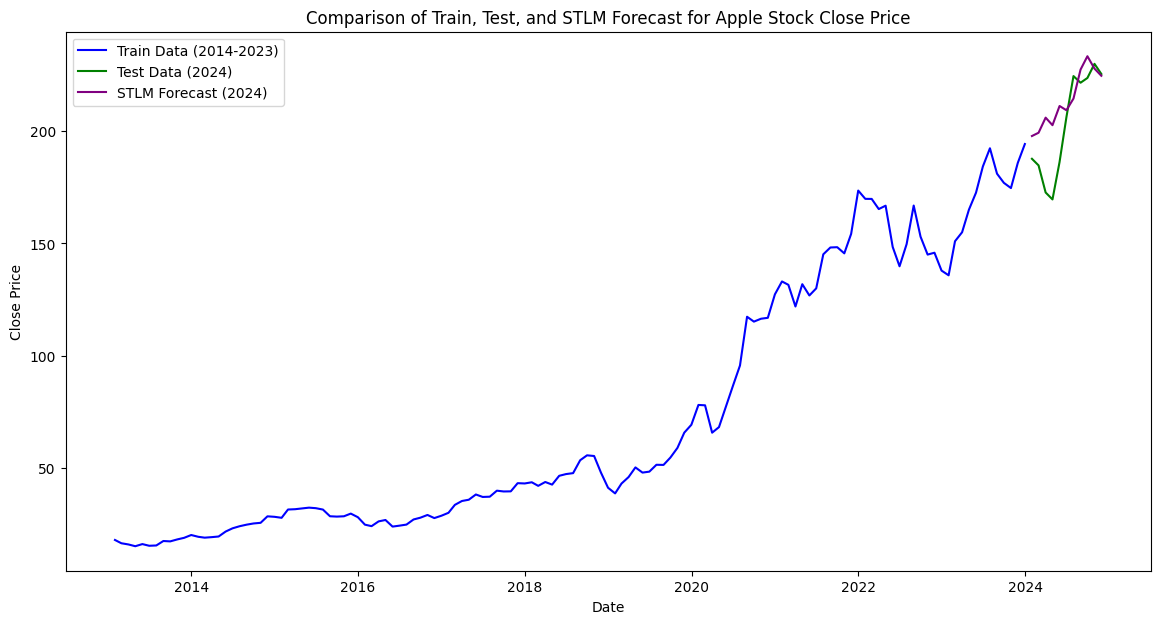

STLM Forecast for 2024:
2024-01-31    197.874170
2024-02-29    199.330582
2024-03-31    206.068001
2024-04-30    202.704225
2024-05-31    211.260888
2024-06-30    209.373138
2024-07-31    214.571309
2024-08-31    227.510575
2024-09-30    233.451446
2024-10-31    227.929431
2024-11-30    224.728629
Freq: ME, dtype: float64


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data = monthly_data.loc[:'2023-12-31']
test_data = monthly_data.loc['2024-01-01':]

stl = STL(train_data['Close'], seasonal=13)
result = stl.fit()

trend_model = ExponentialSmoothing(result.trend, trend='add', seasonal=None).fit()
trend_forecast = trend_model.forecast(len(test_data))

seasonal_forecast = list(result.seasonal[-13:]) * 2 
seasonal_forecast = seasonal_forecast[:len(test_data)] 

stlm_forecast = trend_forecast + seasonal_forecast

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, stlm_forecast, label='STLM Forecast (2024)', color='purple')
plt.title('Comparison of Train, Test, and STLM Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

print("STLM Forecast for 2024:")
print(stlm_forecast)



00:00:27 - cmdstanpy - INFO - Chain [1] start processing
00:00:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\janan\AppData\Local\Temp\ipykernel_14520\3818681724.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range('2024-01-01', periods=11, freq='M')


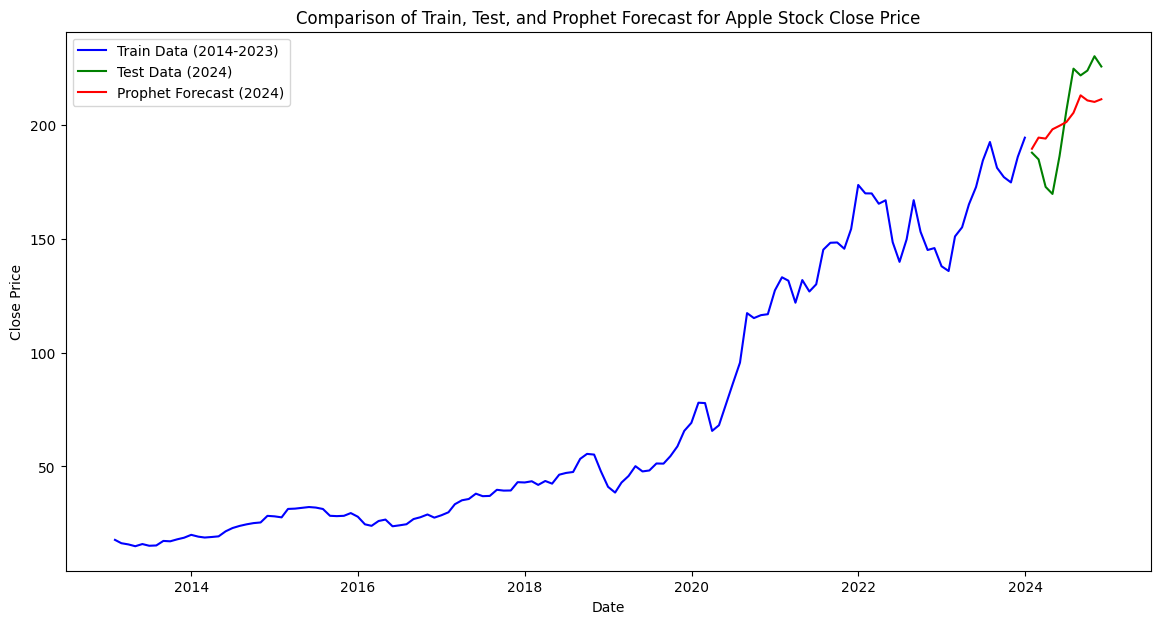

In [69]:
from prophet import Prophet

prophet_data = train_data.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_data)

future_dates = pd.date_range('2024-01-01', periods=11, freq='M')
future = pd.DataFrame({'ds': future_dates})

prophet_forecast = prophet_model.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(future['ds'], prophet_forecast['yhat'], label='Prophet Forecast (2024)', color='red')
plt.title('Comparison of Train, Test, and Prophet Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


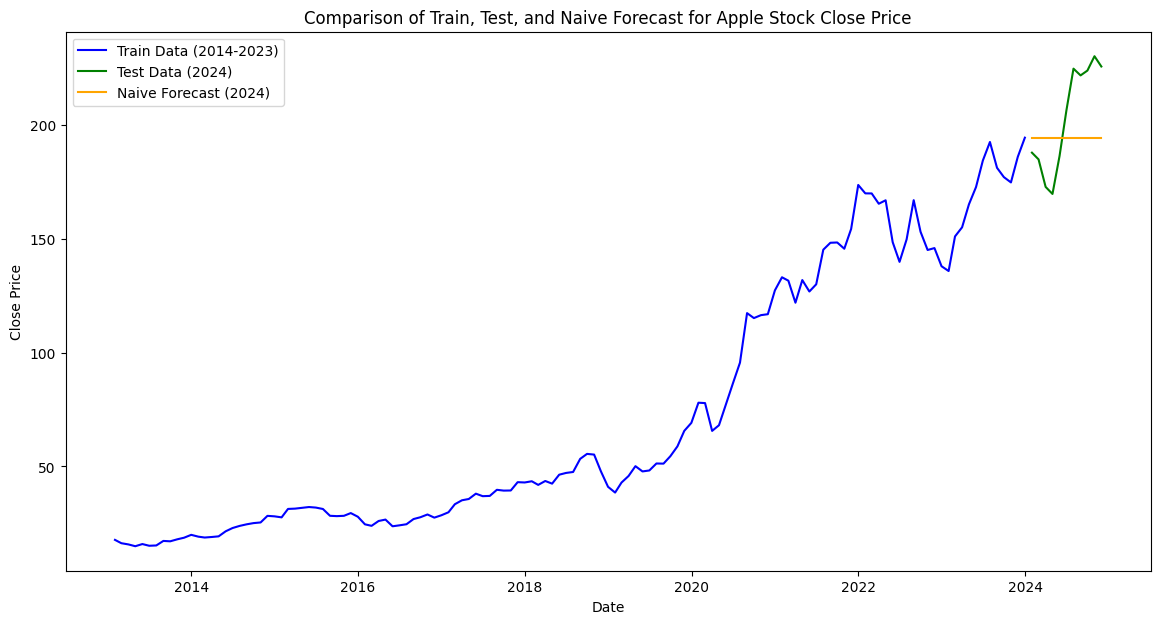

In [70]:

naive_forecast = np.repeat(train_data['Close'].iloc[-1], len(test_data))


plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, naive_forecast, label='Naive Forecast (2024)', color='orange')
plt.title('Comparison of Train, Test, and Naive Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()




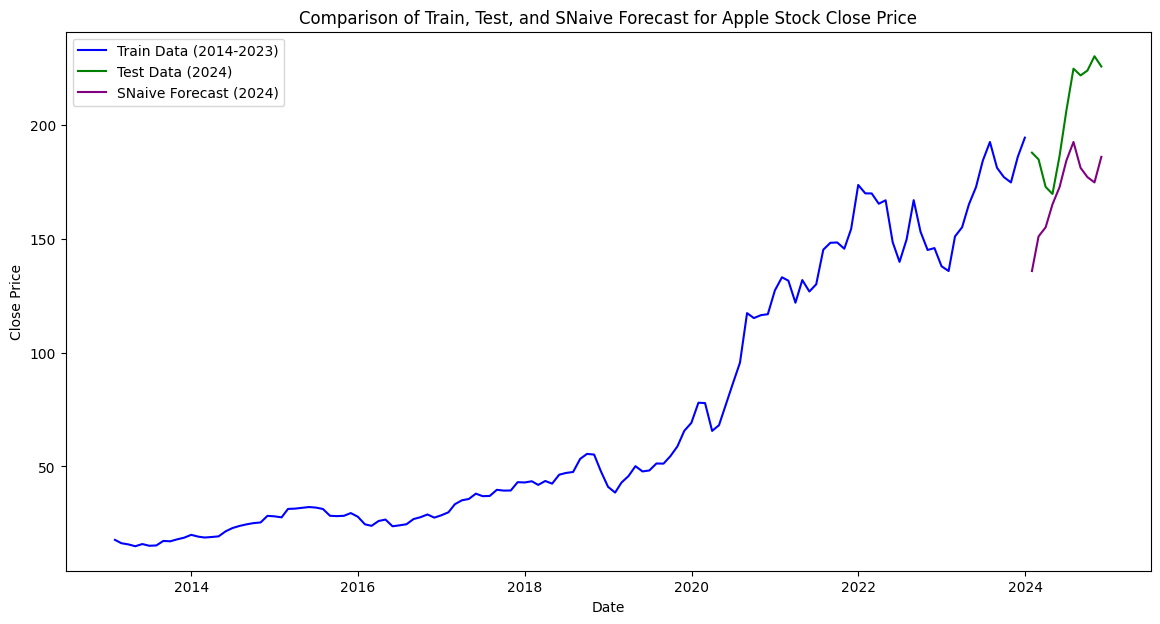

In [71]:

season_length = 12  # Monthly data (1 year seasonality)
snaive_forecast = train_data['Close'].iloc[-season_length:].values

snaive_forecast = np.tile(snaive_forecast, int(np.ceil(len(test_data) / season_length)))[:len(test_data)]

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, snaive_forecast, label='SNaive Forecast (2024)', color='purple')
plt.title('Comparison of Train, Test, and SNaive Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [72]:
# # Import necessary libraries
# import pandas as pd
# import matplotlib.pyplot as plt
# from prophet import Prophet

# # Prepare the data for Prophet
# # Replace 'train_data' with your actual training DataFrame containing 'Date' and 'Close' columns
# prophet_data = train_data.reset_index()[['Date', 'Close']]
# prophet_data.columns = ['ds', 'y']  # Prophet requires the columns to be named 'ds' (date) and 'y' (value)

# # Initialize and train the Prophet model
# prophet_model = Prophet(yearly_seasonality=True)
# prophet_model.fit(prophet_data)

# # Create a future DataFrame only for past data to visualize the components
# future = prophet_model.make_future_dataframe(periods=0)  # No additional periods needed for components plot

# # Forecast on the past data to get seasonal components
# forecast = prophet_model.predict(future)

# # Plot the components, including the monthly seasonality
# fig = prophet_model.plot_components(forecast)
# plt.show()

# # Customizing the model to focus on monthly seasonality
# # Adding a specific monthly seasonality
# prophet_model = Prophet(yearly_seasonality=False)  # Disable default yearly seasonality if needed
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# prophet_model.fit(prophet_data)

# # Forecast on past data with custom seasonality
# forecast = prophet_model.predict(future)

# # Plot the components with custom monthly seasonality included
# fig = prophet_model.plot_components(forecast)
# plt.show()


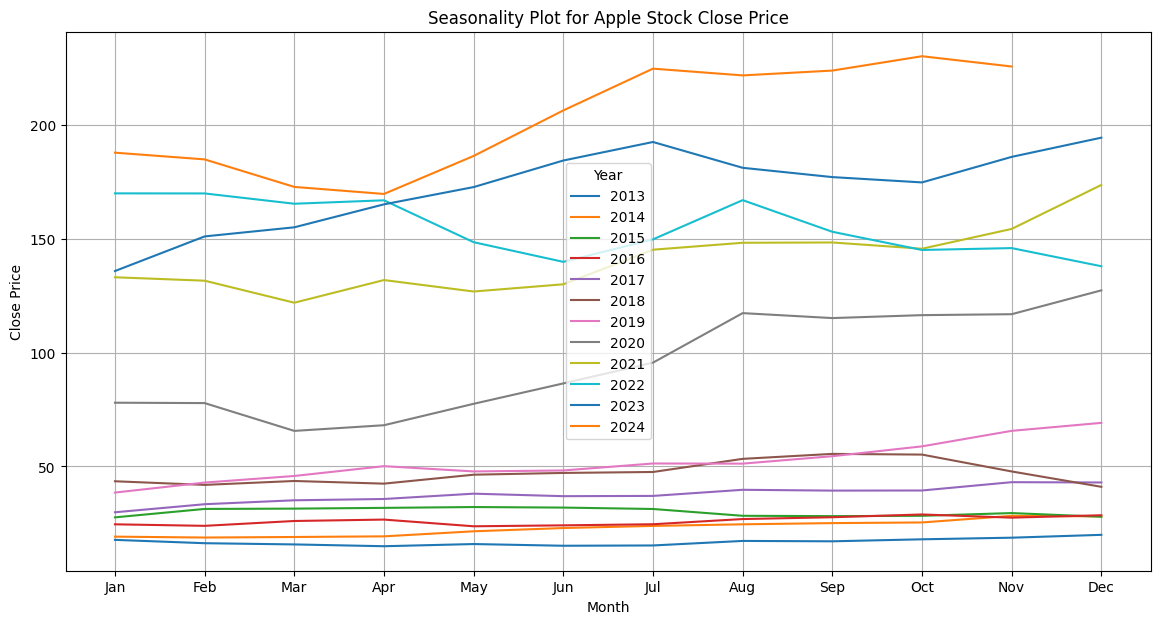

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Month'] = data.index.month
data['Year'] = data.index.year

seasonal_data = data.pivot_table(values='Close', index='Month', columns='Year')

plt.figure(figsize=(14, 7))
for year in seasonal_data.columns:
    plt.plot(seasonal_data.index, seasonal_data[year], label=year)

plt.title('Seasonality Plot for Apple Stock Close Price')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


Yes, the seasonality plot of the Apple stock close price for each year indicates some level of seasonality in certain periods:

1. **General Uptrend in Certain Months**:
   - Some years, such as 2020 and 2023, show a clear upward trend from June to December. This could indicate a seasonal effect where Apple stock prices tend to increase in the latter half of the year.
   
2. **Early Year Decline**:
   - For certain years like 2022 and 2024, there is a slight decline or plateau from January to March or April, which might suggest that the start of the year often sees less aggressive stock price growth.

3. **Yearly Differences**:
   - There is a noticeable variance across different years. For instance, 2018 has a fairly stable trend throughout the year, while 2021 shows a steady increase, highlighting that some years exhibit stronger seasonality than others.

4. **Mid-Year Behavior**:
   - The mid-year months (around June to August) often show mixed trends. For some years, like 2019 and 2016, there is a decrease or leveling off, while in other years (e.g., 2021), there is a noticeable increase.

**Conclusion**:
- While there is some evidence of seasonal patterns in the Apple stock close prices, the level of seasonality can vary significantly year-to-year. In general, the latter part of the year seems to show an increase in prices for multiple years, indicating a potential seasonal trend.
- It’s important to consider other factors like market conditions and events that could also impact these trends.

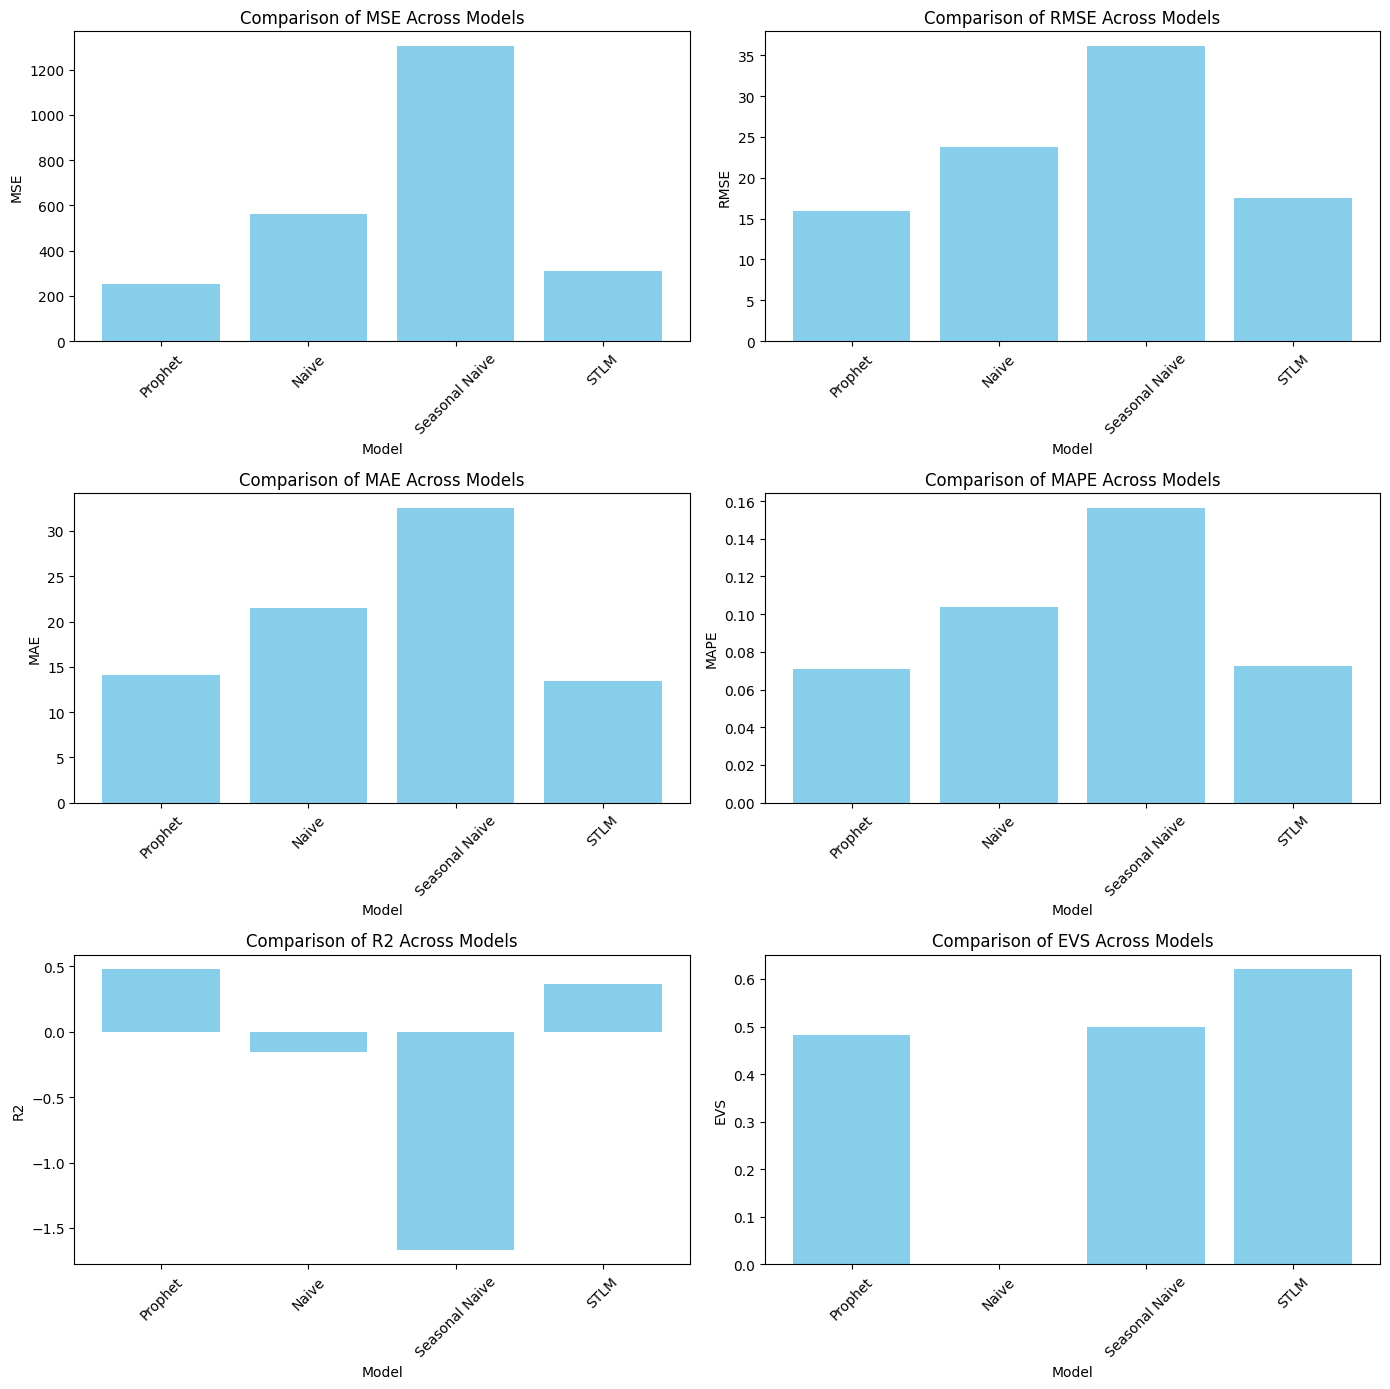

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, explained_variance_score

test = monthly_data['2024':]
def evaluate_model(y_true, y_pred, model_name):
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    
    return {
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape,
        "R2": r2,
        "EVS": evs
    }

def plot_metrics_grid(metrics_list):
    metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2", "EVS"]
    
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
    axes = axes.flatten()  
    
    for i, metric in enumerate(metric_names):
        axes[i].bar([m["Model"] for m in metrics_list], [m[metric] for m in metrics_list], color='skyblue')
        axes[i].set_title(f"Comparison of {metric} Across Models")
        axes[i].set_xlabel("Model")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


models_metrics = []
models_metrics.append(evaluate_model(test['Close'], prophet_forecast['yhat'], "Prophet"))
models_metrics.append(evaluate_model(test['Close'], naive_forecast, "Naive"))
models_metrics.append(evaluate_model(test['Close'], snaive_forecast, "Seasonal Naive"))
models_metrics.append(evaluate_model(test['Close'], stlm_forecast, "STLM"))

plot_metrics_grid(models_metrics)


Importing Necessary Libraries

In [7]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
from datetime import datetime,timedelta
import calendar
from prophet import Prophet
import requests
import time
import json
import matplotlib.pyplot as plt
import re
import pandas as pd
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

Loading News articles from past decade to Compare the Sentiments Analysed by NLTK vs LLM

In [8]:
llm_data = pd.read_csv('articles_sentiment_llm.csv')
llm_data['year_month'] = pd.to_datetime(llm_data['pub_date']).dt.to_period('M')
llm_overall_sentiment = llm_data.groupby('year_month')[['neg', 'neu', 'pos', 'compound']].mean()
llm_overall_sentiment = llm_overall_sentiment.reset_index()


nlp_data = pd.read_csv('articles_sentiment.csv')
nlp_data['year_month'] = pd.to_datetime(nlp_data['pub_date']).dt.to_period('M')
nlp_overall_sentiment = nlp_data.groupby('year_month')[['neg', 'neu', 'pos', 'compound']].mean()
nlp_overall_sentiment = nlp_overall_sentiment.reset_index()

print(llm_overall_sentiment.columns)
print(nlp_overall_sentiment.columns)


Index(['year_month', 'neg', 'neu', 'pos', 'compound'], dtype='object')
Index(['year_month', 'neg', 'neu', 'pos', 'compound'], dtype='object')


Polarity Comparison Over Time - NLTK vs LLM

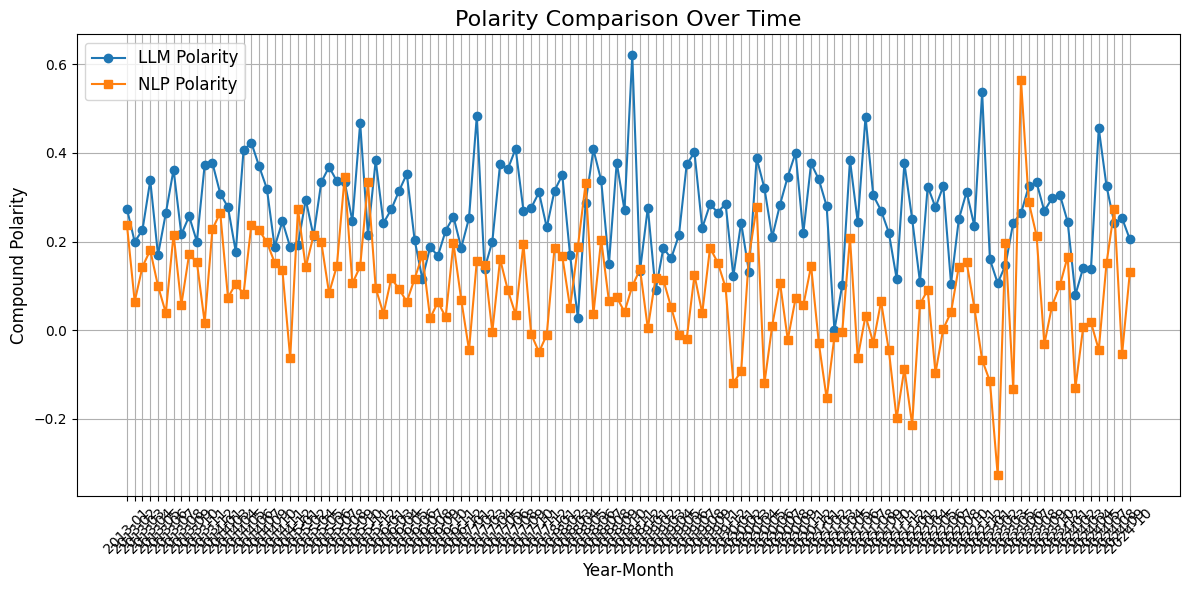

In [9]:
import matplotlib.pyplot as plt

# Ensure year_month is sorted for both datasets
llm_overall_sentiment = llm_overall_sentiment.sort_values(by='year_month')
nlp_overall_sentiment = nlp_overall_sentiment.sort_values(by='year_month')

plt.figure(figsize=(12, 6))

plt.plot(llm_overall_sentiment['year_month'].astype(str), llm_overall_sentiment['compound'], label='LLM Polarity', marker='o')
plt.plot(nlp_overall_sentiment['year_month'].astype(str), nlp_overall_sentiment['compound'], label='NLP Polarity', marker='s')

plt.title('Polarity Comparison Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Compound Polarity', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


#### Observations:
##### LLM Polarity (Blue Line):

- The LLM polarity scores (blue line) demonstrate a more stable trend over time.
-  There is a consistent range, with the polarity staying mostly positive, suggesting that LLM is more balanced in identifying sentiment and avoids extreme variations.
- Peaks and troughs are present, but they appear smoother compared to NLTK, showing that LLM potentially captures nuances better.
##### NLTK Polarity (Orange Line):

- The NLTK polarity scores (orange line) exhibit more frequent and sharper fluctuations.
- There are significant dips into the negative polarity range, indicating that NLTK is more sensitive to certain words or phrases that might trigger strong negative sentiment.
- The variability and extremes in NLTK scores could point to an overreaction to sentiment-laden words, leading to less consistency.
##### Trend Comparison:

- The LLM seems to capture sentiment more consistently, while NLTK shows a lot of noise (frequent spikes and dips).
- NLTK often underestimates or overestimates sentiment compared to LLM.
##### Alignment Between LLM and NLTK:

- While both models generally follow the same upward or downward trends, the magnitude of change is significantly different.
- LLM appears to smooth out erratic behavior, potentially indicating a better understanding of context.

Defining functions to Handle Different Analysis

- Loading Appl Stock Data From 2013. 
- Using prophet to forecast for the next 10 months.

In [10]:
def get_forecast():
    ticker = "AAPL"
    stock_data = yf.download(ticker, start="2013-01-01", end =datetime.now().strftime("%Y-%m-%d"))
    data = stock_data
    data['Date'] = data.index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    monthly_data = data.resample('M').mean()
    prophet_data = monthly_data.reset_index()[['Date', 'Close']]
    prophet_data.columns = ['ds', 'y']
    p_data = data[['Close']].reset_index()
    p_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
    model = Prophet()
    model.fit(p_data)
    
############            Getting Daily Forecast                 ###############
    future_dates = model.make_future_dataframe(periods=30)
    forecast_dates = model.predict(future_dates)
    fig = model.plot(forecast_dates)
    plt.title('30-day Forecast of Apple Stock Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

############            Getting Monthly Forecast                 ###############
    model = Prophet()
    model.fit(prophet_data)
    future_dates_month = model.make_future_dataframe(periods=10, freq='M')
    forecast_month = model.predict(future_dates_month)
    fig = model.plot(forecast_month)

    plt.title('10-Month Forecast of Apple Stock Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

    return forecast_dates, forecast_month


[*********************100%***********************]  1 of 1 completed
00:16:52 - cmdstanpy - INFO - Chain [1] start processing
00:16:54 - cmdstanpy - INFO - Chain [1] done processing


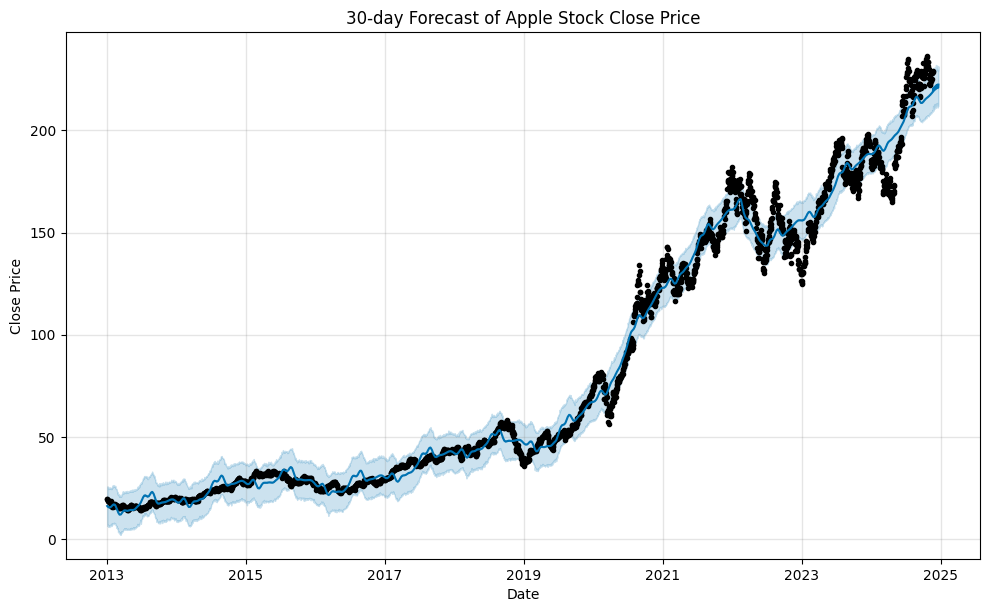

00:16:55 - cmdstanpy - INFO - Chain [1] start processing
00:16:55 - cmdstanpy - INFO - Chain [1] done processing


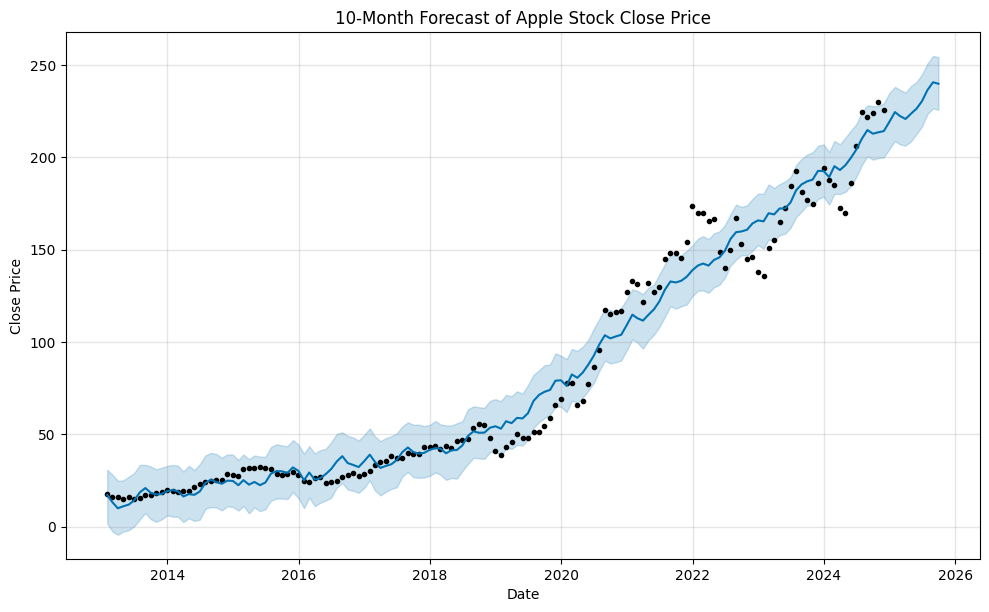

In [11]:
forecast_dates, forecast_month = get_forecast()

Defining Functions 
- to fetch articles for the current month from New york Times in real time.

In [12]:
ollama_url = "http://127.0.0.1:11434/api/generate"

def concatenate_headline(dict_item):
    concatenated = ' '.join([str(value) for value in dict_item.values() if value])
    return concatenated
def get_articles_of_this_month(search_keywords):

    year = datetime.now().strftime('%Y')
    month = datetime.now().strftime('%m')
    

    api_key = "nSJlJTCMVqCArRKWgg3W4tK9LenCmsMd"
    base_url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json"

    url = base_url.format(year=year, month=month)
    params = {'api-key': api_key}
    response = requests.get(url, params=params)
    data = response.json()
    

    all_articles = []
    articles = data['response']['docs']
    for article in articles:
        for keyword in search_keywords:
            if keyword.lower() in article['headline']['main'].lower():
                all_articles.append(article)
                break  
    print(f"Found {len(articles)} articles in {year}-{month}")
    print(f"Found {len(all_articles)} articles in {year}-{month} related to APPL")
    news_data=pd.DataFrame(all_articles)
    filtered_columns_data = news_data[['abstract', 'snippet', 'lead_paragraph', 'headline', 'pub_date']]
    
    filtered_columns_data['headline_combined'] = filtered_columns_data['headline'].apply(concatenate_headline)
    filtered_columns_data = filtered_columns_data.drop('headline', axis=1)
    text = []
    for j in range(filtered_columns_data.shape[0]):
        str1=''
        for i in [0,1,2,4]:
            str1 += filtered_columns_data.iloc[j,i]
        text.append(str1)

    # filtered_columns_data.iloc[:,5:]
    filtered_columns_data['text_in_article'] = text
    return filtered_columns_data

Defining Function to Summarize the articles and provide a gist.

In [13]:
def summarize_text(text):
    payload = {
        "model": "llama2",
        "prompt": f"Summarize the following text:\n\n{text}\n\nSummary:"
    }
    
    try:
        response = requests.post(ollama_url, json=payload, stream=True)
        response.raise_for_status()  # Raise an error for bad status codes
        
        full_response = []
        for line in response.iter_lines():
            if line:
                data = json.loads(line.decode('utf-8'))
                partial_response = data.get("response", "")
                full_response.append(partial_response)
        
        return "".join(full_response)
    
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return ""

Defining Function to Analyse Sentiment from the Summarized News articles

In [14]:
def analyze_sentiment(text):
    payload = {
        "model": "llama2",
        "prompt": f"Analyze the sentiment of the following text and provide just the sentiment scores in the format {{'neg': , 'neu': , 'pos': , 'compound': }}:\n\n{text}\n\nSentiment Scores: in 2 decimals . Please do not output any other text in your response"
    }
    
    try:
        response = requests.post(ollama_url, json=payload, stream=True)
        response.raise_for_status()  # Raise an error for bad status codes
        # print(f"Response Status: {response.status_code}")

        full_response = []
        for line in response.iter_lines():
            if line:
                data = json.loads(line.decode('utf-8'))
                partial_response = data.get("response", "")
                full_response.append(partial_response)
        
        response_text = "".join(full_response)
        # print(f"Response Text: {response_text}")

        scores = {
            "neg": 0.0,
            "neu": 0.0,
            "pos": 0.0,
            "compound": 0.0
        }
        
        match = re.search(r"\{(.*)\}", response_text)
        if not match:
            return scores

        match_groups = match.group(1).split(',')
        if len(match_groups) > 0:
            scores['neg'] = float(match_groups[0].split(': ')[1])
        if len(match_groups) > 1:
            scores['neu'] = float(match_groups[1].split(': ')[1])
        if len(match_groups) > 2:
            scores['pos'] = float(match_groups[2].split(': ')[1])
        if len(match_groups) > 3:
            scores['compound'] = float(match_groups[3].split(': ')[1])
        
        return scores

    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return scores

Defining Function to get current month's sentiment and going through the work flow.
- It takes as input the search words.
- This is to make sure that in the future we could use the application on multiple stock tickers.

In [15]:

def get_Current_months_sentiment(search_keywords):

    df = get_articles_of_this_month(search_keywords)
    with ThreadPoolExecutor() as executor:
        df['summary'] = list(tqdm(executor.map(summarize_text, df['text_in_article']), total=len(df), desc="Summarizing"))

    print("Summarization complete.")
    tqdm.pandas()

    df['sentiment'] = df['summary'].progress_apply(analyze_sentiment)
    df_sentiment = df['sentiment'].apply(pd.Series)
    df = pd.concat([df, df_sentiment], axis=1)
    df['year_month'] = pd.to_datetime(df['pub_date']).dt.to_period('M')
    overall_sentiment = df.groupby('year_month')[['neg', 'neu', 'pos', 'compound']].mean()

    overall_sentiment = overall_sentiment.reset_index()
    return overall_sentiment['compound'].iloc[0]


In [16]:
list_of_keywords =  [
    "iPhone", "Mac", "MacBook", "MacBook Pro", "MacBook Air", "iMac", 
    "Mac Pro", "Mac Mini", "iPad", "iPad Pro", "iPad Air", "iPad Mini", 
    "Apple Watch", "AirPods", "AirPods Pro", "AirPods Max", "Apple TV", 
    "HomePod", "HomePod Mini", "Apple Pencil", "Magic Keyboard", 
    "Studio Display", "Pro Display XDR",
    "iOS", "macOS", "iPadOS", "watchOS", "tvOS", "Apple", 
    "Apple Music", "Apple Arcade", "Apple News+", "Apple TV+", 
    "Apple Fitness+", "Apple Pay", "Apple Wallet", "Apple Card", 
    "Apple Podcasts", "Apple One", "iCloud", "iCloud+",
    "Retina Display", "Liquid Retina", "Dynamic Island", "M1 Chip", 
    "M2 Chip", "Apple Silicon", "ProMotion", "Face ID", "Touch ID", 
    "MagSafe", "AppleCare", "Handoff", "Continuity", "AirDrop", "iWork",
    "Siri", "Safari", "App Store", "iMessage", "FaceTime", "Find My", 
    "Time Machine", "iTunes",
    "WWDC", "Apple Keynote", "Apple Event", "Spring Loaded", 
    "Far Out Event", "Unleashed Event", "Tim Cook", "Apple Park", 
    "Apple Store", "Apple Stock",
    "Apple AR Glasses", "Vision Pro", "Apple Mixed Reality Headset", 
    "Apple Neural Engine", "Apple Research",' Apple ', ' iPhone ', ' MacBook ', ' iPad ', ' Apple Watch ', ' iOS ', ' MacOS ', 'Mac',
    "Apple Recycling Program", "Apple Environmental Goals"
]

# get_Current_months_sentiment(list_of_keywords)

In [17]:
forecast_month[['yhat','yhat_lower','yhat_upper','ds']]

last_day = calendar.monthrange(datetime.now().year, datetime.now().month)[1]
last_date = datetime(datetime.now().year, datetime.now().month, last_day).strftime('%Y-%m-%d')
forecast_month[forecast_month['ds'] == last_date][['yhat','yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
142,214.156932,199.891859,229.245378


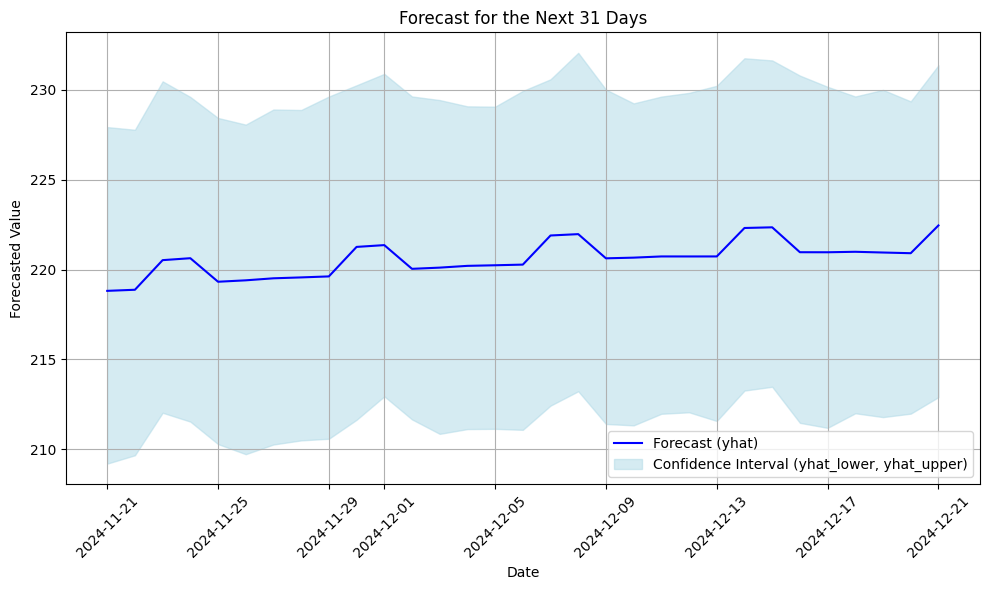

In [18]:
forecast_tail = forecast_dates.tail(31)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_tail['ds'], forecast_tail['yhat'], label='Forecast (yhat)', color='blue')
plt.fill_between(
    forecast_tail['ds'],
    forecast_tail['yhat_lower'],
    forecast_tail['yhat_upper'],
    color='lightblue',
    alpha=0.5,
    label='Confidence Interval (yhat_lower, yhat_upper)',
)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Forecasted Value')
plt.title('Forecast for the Next 31 Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Getting Recommendation

- By default runs for today's date.
- Specific date can be passed as well, in which case this will be solely used to get the recommendation.

In [19]:
from datetime import datetime, timedelta

def get_recommendation(date=datetime.now()):
    # Ensure date is a datetime object
    if isinstance(date, str):
        date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

    ten_days_ago = date - timedelta(days=10)
    past_10_days_forecast = forecast_dates[(forecast_dates['ds'] < date) & (forecast_dates['ds'] > ten_days_ago)]['yhat'].mean()
    today_forecast = forecast_dates[forecast_dates['ds'] == date.strftime("%Y-%m-%d")]['yhat'].iloc[0]

    return today_forecast > past_10_days_forecast

get_recommendation(datetime.strptime('2024-25-11', '%Y-%d-%m').strftime('%Y-%m-%d %H:%M:%S'))
get_recommendation()

True

Recommendation Based on momentum

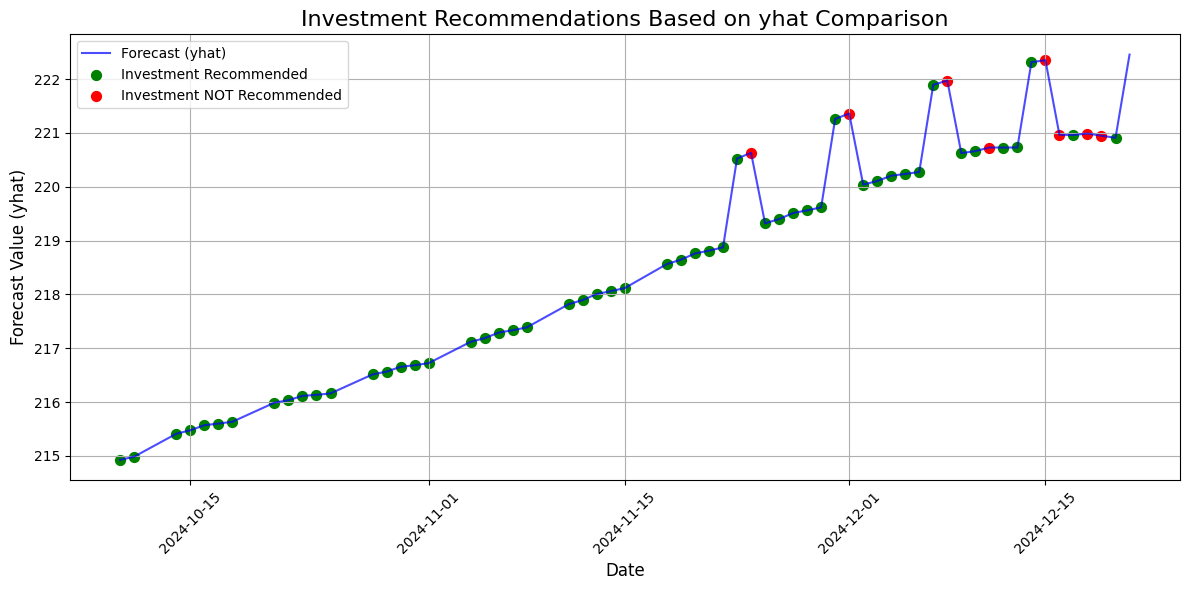

In [20]:
dt = forecast_dates.tail(61)

dt['recommendation'] = [
    'Recommended' if dt['yhat'].iloc[i] > dt['yhat'].iloc[i - 1] else 'Not Recommended'
    for i in range(1, len(dt))
] + ['No Comparison']  

plt.figure(figsize=(12, 6))

plt.plot(dt['ds'], dt['yhat'], label='Forecast (yhat)', color='blue', alpha=0.7)

plt.scatter(
    dt[dt['recommendation'] == 'Recommended']['ds'],
    dt[dt['recommendation'] == 'Recommended']['yhat'],
    color='green',
    label='Investment Recommended',
    s=50,
)

plt.scatter(
    dt[dt['recommendation'] == 'Not Recommended']['ds'],
    dt[dt['recommendation'] == 'Not Recommended']['yhat'],
    color='red',
    label='Investment NOT Recommended',
    s=50,
)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Forecast Value (yhat)', fontsize=12)
plt.title('Investment Recommendations Based on yhat Comparison', fontsize=16)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Recommendation based on Sentiment

In [22]:
# Normalize dates to remove times
llm_data['pub_date'] = pd.to_datetime(llm_data['pub_date']).dt.normalize()
forecast_dates['ds'] = pd.to_datetime(forecast_dates['ds'])

# Remove timezone information from 'pub_date' to match 'ds'
llm_data['pub_date'] = llm_data['pub_date'].dt.tz_localize(None)

# Debug: Check overlapping dates
print("Unique dates in forecast_dates:")
print(forecast_dates['ds'].dt.date.unique())

print("Unique dates in llm_data:")
print(llm_data['pub_date'].dt.date.unique())

# Merge after ensuring alignment
recommendation_data = forecast_dates.merge(
    llm_data[['pub_date', 'compound']],
    left_on='ds',
    right_on='pub_date',
    how='left'
)

# Define recommendation logic
recommendation_data['recommendation'] = recommendation_data['compound'].apply(
    lambda x: '+ve' if x > 0.05 else '-ve' if pd.notna(x) else 'No Data'
)

# Display sample
print(recommendation_data[['ds', 'compound', 'recommendation']].head())


Unique dates in forecast_dates:
[datetime.date(2013, 1, 2) datetime.date(2013, 1, 3)
 datetime.date(2013, 1, 4) ... datetime.date(2024, 12, 19)
 datetime.date(2024, 12, 20) datetime.date(2024, 12, 21)]
Unique dates in llm_data:
[datetime.date(2013, 1, 1) datetime.date(2013, 1, 2)
 datetime.date(2013, 1, 3) ... datetime.date(2024, 10, 2)
 datetime.date(2024, 10, 9) datetime.date(2024, 10, 11)]
          ds  compound recommendation
0 2013-01-02      0.02            -ve
1 2013-01-02      0.00            -ve
2 2013-01-03      1.00            +ve
3 2013-01-04       NaN        No Data
4 2013-01-07      0.65            +ve


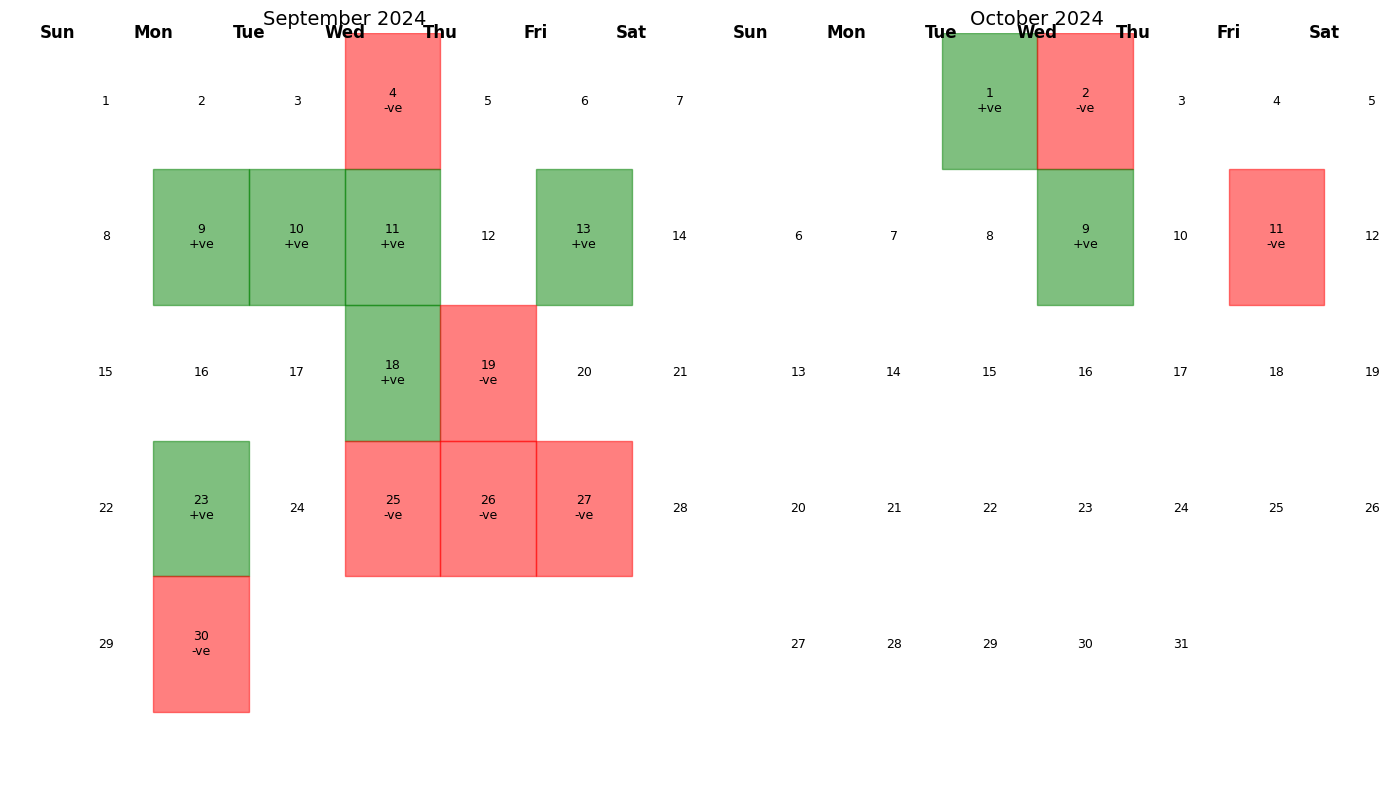

In [23]:
# Filter the last 5 months of data
recommendation_data['month'] = recommendation_data['ds'].dt.to_period('M')
last_5_months = recommendation_data['month'].unique()[-4:]
filtered_data = recommendation_data[recommendation_data['month'].isin(last_5_months)]

# Filter out months with only "No Data"
valid_months = []
for period in last_5_months:
    month_data = filtered_data[filtered_data['month'] == period]
    if (month_data['recommendation'] != 'No Data').any():
        valid_months.append(period)

# Create subplots for valid months
fig, axes = plt.subplots(len(valid_months) // 2 + len(valid_months) % 2, 2, figsize=(14, len(valid_months) * 4))
axes = axes.flatten()[:len(valid_months)]

for i, period in enumerate(valid_months):
    year, month = period.year, period.month
    ax = axes[i]
    
    # Create a calendar for the month
    cal = calendar.Calendar(firstweekday=6)
    month_days = cal.monthdayscalendar(year, month)

    # Prepare data for plotting
    month_data = filtered_data[filtered_data['month'] == period]
    plot_data = {day: 'No Data' for day in range(1, 32)}
    for _, row in month_data.iterrows():
        day = row['ds'].day
        plot_data[day] = row['recommendation']

    # Add weekday labels
    days_of_week = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    for col, day_name in enumerate(days_of_week):
        ax.text(col, len(month_days), day_name, ha='center', va='center', fontsize=12, weight='bold')

    # Plot days
    for row, week in enumerate(month_days):
        for col, day in enumerate(week):
            if day == 0:
                continue  # Skip empty cells
            recommendation = plot_data.get(day, 'No Data')

            # Determine color based on recommendation
            if recommendation == '+ve':
                color = 'green'
            elif recommendation == '-ve':
                color = 'red'
            else:
                color = None

            # Draw day cell with recommendation
            if color:
                ax.add_patch(plt.Rectangle((col, len(month_days) - row - 1), 1, 1, color=color, alpha=0.5))
                ax.text(col + 0.5, len(month_days) - row - 1 + 0.5,
                        f'{day}\n{recommendation}', ha='center', va='center', fontsize=9, color='black')
            else:
                ax.text(col + 0.5, len(month_days) - row - 1 + 0.5,
                        f'{day}', ha='center', va='center', fontsize=9, color='black')

    ax.set_xlim(-0.5, 6.5)
    ax.set_ylim(-0.5, len(month_days))
    ax.set_title(f'{calendar.month_name[month]} {year}', fontsize=14)
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


- Sentiment trends can vary within a single month. 
- **For example**:
    - September starts negatively (4th), improves mid-month (9th to 13th), and ends with more negative signals (25th onward).
    - October shows alternating sentiment without clear trends.

Downward Trend ,
- 1.0 Indicates Declining Forecast - Investment is not recommended.
- 0.0 Otherwise

In [24]:
n_days = 10

# Check for downward trends using rolling apply
forecast_dates['downward_trend'] = forecast_dates['yhat'].rolling(window=n_days).apply(
    lambda x: 1 if all(x[j] > x[j + 1] for j in range(len(x) - 1)) else 0,
    raw=True
)

not_recommended = forecast_dates[forecast_dates['downward_trend'] == 1]

print(not_recommended[['ds', 'yhat', 'downward_trend']])


             ds        yhat  downward_trend
33   2013-02-20   15.168640             1.0
34   2013-02-21   14.867407             1.0
35   2013-02-22   14.567184             1.0
36   2013-02-25   13.919727             1.0
37   2013-02-26   13.640423             1.0
...         ...         ...             ...
2945 2024-09-16  213.963939             1.0
2946 2024-09-17  213.811356             1.0
2947 2024-09-18  213.711082             1.0
2948 2024-09-19  213.567266             1.0
2949 2024-09-20  213.450533             1.0

[396 rows x 3 columns]


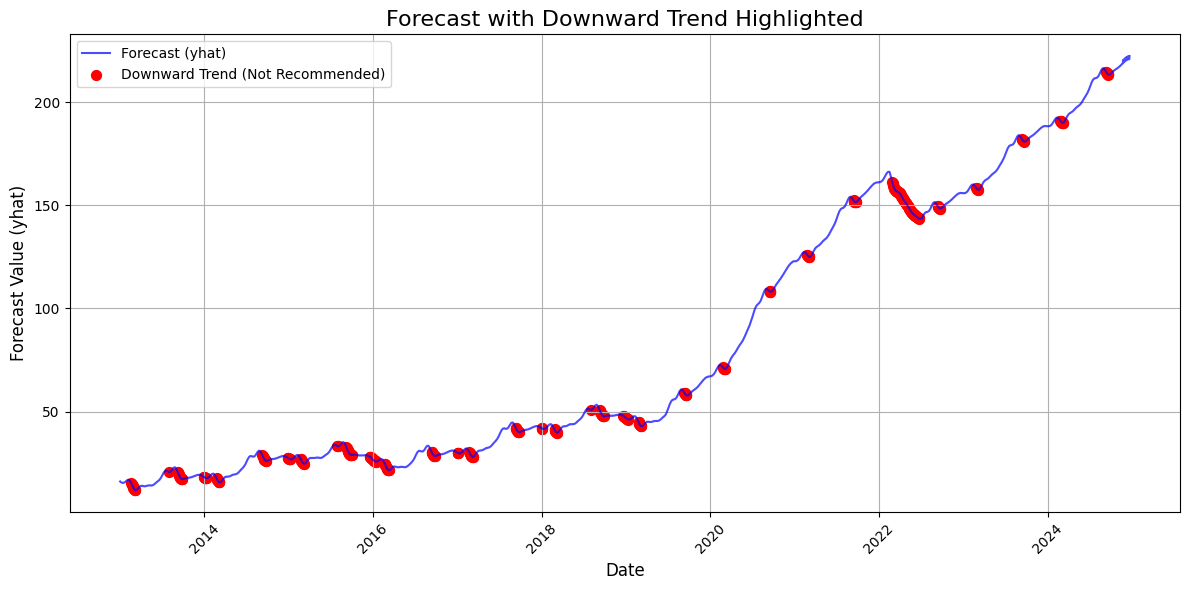

In [25]:
import matplotlib.pyplot as plt

forecast_dates = forecast_dates.copy()  

not_recommended = forecast_dates[forecast_dates['downward_trend'] == 1]

plt.figure(figsize=(12, 6))

plt.plot(forecast_dates['ds'], forecast_dates['yhat'], label='Forecast (yhat)', color='blue', alpha=0.7)
plt.scatter(not_recommended['ds'], not_recommended['yhat'], color='red', label='Downward Trend (Not Recommended)', s=50)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Forecast Value (yhat)', fontsize=12)
plt.title('Forecast with Downward Trend Highlighted', fontsize=16)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Insights:

- Uptrend: Most of the forecast data shows a gradual increase over time, indicating a generally positive trajectory for the forecasted values.
- Downtrend (Not Recommended): The red points indicate periods where the rolling window detected a steady decline in the forecast. These periods might signal times where investment or action is less favorable.

#### Application:

- In practical scenarios (e.g., financial forecasting), the red points can be used as a signal to avoid investments or take caution during these timeframes.
- For non-financial use cases, the downward trends might indicate periods of concern or areas requiring further analysis or intervention.


Target Profitability

In [31]:
forecast_dates['ten_day_mean'] = forecast_dates['yhat'].rolling(window=10).mean()

profit_threshold = 1.01
forecast_dates['recommendation_target'] = forecast_dates['yhat'] > (forecast_dates['ten_day_mean'] * profit_threshold)
recommended = forecast_dates[forecast_dates['recommendation_target'] == True]
not_recommended = forecast_dates[forecast_dates['recommendation_target'] == False]
print(not_recommended[['ds', 'yhat', 'ten_day_mean']])

             ds        yhat  ten_day_mean
0    2013-01-02   16.077939           NaN
1    2013-01-03   15.929824           NaN
2    2013-01-04   15.794063           NaN
3    2013-01-07   15.687689           NaN
4    2013-01-08   15.597385           NaN
...         ...         ...           ...
3019 2024-12-17  220.961013    221.202579
3020 2024-12-18  220.987705    221.104335
3021 2024-12-19  220.946821    221.136669
3022 2024-12-20  220.908623    221.161410
3023 2024-12-21  222.453979    221.333984

[2150 rows x 3 columns]


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=forecast_dates['ds'],
    y=forecast_dates['yhat'],
    mode='lines',
    name='Forecast (yhat)',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=recommended['ds'],
    y=recommended['yhat'],
    mode='markers',
    name='Investment Recommended',
    marker=dict(color='green', size=10, symbol='triangle-up')
))

fig.add_trace(go.Scatter(
    x=not_recommended['ds'],
    y=not_recommended['yhat'],
    mode='markers',
    name='Investment NOT Recommended',
    marker=dict(color='red', size=8, symbol='circle')
))

fig.add_trace(go.Scatter(
    x=forecast_dates['ds'],
    y=forecast_dates['ten_day_mean'] * profit_threshold,
    mode='lines',
    name='Profit Threshold',
    line=dict(color='orange', dash='dash')
))

fig.update_layout(
    title='Interactive Investment Recommendations',
    xaxis_title='Date',
    yaxis_title='Forecast Value (yhat)',
    template='plotly_white'
)

fig.show()


In [35]:
def get_final_recommendation(
    recommendation_target, 
    downward_trend, 
    recommendation, 
    past_10_days_recommendation, 
    current_month_sentiment, 
    sentiment_weight=0.5, 
    trend_weight=0.2, 
    past_10_days_weight=0.15, 
    recommendation_target_weight=0.1, 
    simple_recommendation_weight=0.05
):
    """
    Function to decide final recommendation based on multiple components with weighted priorities.
    
    Parameters:
    recommendation_target (bool): Forecast-based recommendation target (True/False).
    downward_trend (float): 1.0 for downward trend, 0.0 or NaN otherwise.
    recommendation (str): "Recommended" or "Not Recommended" based on momentum.
    past_10_days_recommendation (bool): True if past 10 days recommend investment, False otherwise.
    current_month_sentiment (float): Compound sentiment score for the current month.
    sentiment_weight (float): Weight for sentiment score (default=0.5).
    trend_weight (float): Weight for downward trend component (default=0.2).
    past_10_days_weight (float): Weight for past 10 days recommendation (default=0.15).
    recommendation_target_weight (float): Weight for recommendation target (default=0.1).
    simple_recommendation_weight (float): Weight for simple recommendation (default=0.05).
    
    Returns:
    str: Final recommendation - "Recommended" or "Not Recommended".
    """
    # Scale sentiment to range between 0 and 1
    sentiment_score = max(0, min(1, current_month_sentiment))  # Clamp sentiment between 0 and 1
    
    # Normalize other components
    trend_score = 1.0 if downward_trend == 1.0 else 0.0
    recommendation_target_score = 1.0 if recommendation_target else 0.0
    past_10_days_score = 1.0 if past_10_days_recommendation else 0.0
    simple_recommendation_score = 1.0 if recommendation == "Recommended" else 0.0
    
    # Compute weighted average
    final_score = (
        sentiment_score * sentiment_weight +
        trend_score * trend_weight +
        recommendation_target_score * recommendation_target_weight +
        past_10_days_score * past_10_days_weight +
        simple_recommendation_score * simple_recommendation_weight
    )
    
    # Decide based on a threshold
    return "Recommended" if final_score >= 0.5 else "Not Recommended"


example_recommendation_target = forecast_dates[forecast_dates['ds']== datetime.now().strftime('%Y-%m-%d')]['recommendation_target'].iloc[0]
example_downward_trend = forecast_dates[forecast_dates['ds']== datetime.now().strftime('%Y-%m-%d')]['downward_trend'].iloc[0]
example_recommendation = dt[dt['ds'] == datetime.now().strftime('%Y-%m-%d')]['recommendation'].iloc[0]
example_past_10_days_recommendation = get_recommendation()
example_current_month_sentiment = get_Current_months_sentiment(list_of_keywords)

final_recommendation = get_final_recommendation(
    example_recommendation_target, 
    example_downward_trend, 
    example_recommendation, 
    example_past_10_days_recommendation, 
    example_current_month_sentiment
)

final_recommendation


Found 3643 articles in 2024-11
Found 19 articles in 2024-11 related to APPL


Summarizing: 100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [19:35<00:00, 61.85s/it]


Summarization complete.


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [14:09<00:00, 44.69s/it]


'Not Recommended'